<a href="https://colab.research.google.com/github/yoshimethod/bioinformatics/blob/main/bioinformatics_pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.7 MB/s eta 0:00:00


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import sklearn

In [6]:
gse_mRNA_exprs_normal_selected=pd.read_csv("/content/drive/MyDrive/GSE36376_normal.csv", index_col=0)
gse_mRNA_exprs_tumor_selected=pd.read_csv("/content/drive/MyDrive/GSE36376_tumor.csv", index_col=0)

In [8]:
gse_mRNA_exprs_normal_selected.loc['class']=0
gse_mRNA_exprs_tumor_selected.loc['class']=1

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
gse_mRNA_exprs_normal_selected_train, gse_mRNA_exprs_normal_selected_test=train_test_split(gse_mRNA_exprs_normal_selected.T, train_size=0.75, random_state=0)
gse_mRNA_exprs_tumor_selected_train, gse_mRNA_exprs_tumor_selected_test=train_test_split(gse_mRNA_exprs_tumor_selected.T, train_size=0.75, random_state=0)

In [13]:
gse_mRNA_exprs_train=pd.concat([gse_mRNA_exprs_normal_selected_train, gse_mRNA_exprs_tumor_selected_train])
X_train=gse_mRNA_exprs_train.iloc[:,0:-1]
y_train=gse_mRNA_exprs_train.iloc[:, -1]
gse_mRNA_exprs_test=pd.concat([gse_mRNA_exprs_normal_selected_test, gse_mRNA_exprs_tumor_selected_test])
X_test =gse_mRNA_exprs_test.iloc[:, 0:-1]
y_test =gse_mRNA_exprs_test.iloc[:, -1]

In [14]:
X_train.describe()

Symbol,MT1G,HAMP,MT1F,FCN3,CYP3A4,MT1H,CYP1A2,SPINK1,AKR1B10,GPC3,MT1M,TOP2A,CLEC1B
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,11.592484,10.679672,10.358558,9.992271,9.743794,9.522384,9.430548,9.323191,9.000996,8.362934,8.289994,7.536580,7.138975
std,2.726317,2.769697,2.457899,2.524754,2.701083,2.720323,3.003620,3.035246,2.719765,2.422019,2.163480,1.618519,1.624832
min,6.421117,6.579506,6.287872,5.759413,5.541597,5.650433,5.646007,5.672313,5.713809,5.505577,5.515545,5.487845,5.263245
25%,9.001321,7.802423,7.757092,7.336304,6.684946,6.781180,6.021638,6.488306,6.487949,6.130235,6.043194,6.037377,5.673154
50%,12.690336,10.483947,10.850347,10.600522,10.551383,9.946680,9.765023,8.223943,8.239076,7.370867,8.027586,6.981059,6.528087
75%,14.145431,13.606179,12.779727,12.393297,12.225083,12.136667,12.416782,12.724850,11.647682,10.798906,10.326342,9.043164,8.625387
max,14.604863,14.395189,14.350171,13.684159,14.161284,14.248271,14.019988,14.501329,14.195891,13.370585,14.324015,11.160612,11.374832


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [17]:
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
X_train_std_df=pd.DataFrame(X_train_std)
X_train_std_df.columns=X_train.columns
X_train_std_df.describe()

Symbol,MT1G,HAMP,MT1F,FCN3,CYP3A4,MT1H,CYP1A2,SPINK1,AKR1B10,GPC3,MT1M,TOP2A,CLEC1B
count,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02,3.240000e+02
mean,1.754427e-15,-1.096517e-15,1.096517e-15,8.333526e-16,-8.772133e-16,-3.157968e-15,-2.456197e-15,-6.140493e-16,8.772133e-16,-1.886008e-15,2.280754e-15,-2.017590e-15,-6.140493e-16
std,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00,1.001547e+00
min,-1.899766e+00,-1.482656e+00,-1.658726e+00,-1.679136e+00,-1.558152e+00,-1.425544e+00,-1.261943e+00,-1.204688e+00,-1.210498e+00,-1.181566e+00,-1.284384e+00,-1.267766e+00,-1.156201e+00
25%,-9.518965e-01,-1.040438e+00,-1.060047e+00,-1.053598e+00,-1.134204e+00,-1.009235e+00,-1.136689e+00,-9.354330e-01,-9.254236e-01,-9.232597e-01,-1.040118e+00,-9.277131e-01,-9.035325e-01
50%,4.033095e-01,-7.077586e-02,2.003946e-01,2.412878e-01,2.994494e-01,1.562138e-01,1.115296e-01,-3.627210e-01,-2.805754e-01,-4.102369e-01,-1.214772e-01,-3.437587e-01,-3.765515e-01
75%,9.378572e-01,1.058251e+00,9.865800e-01,9.524650e-01,9.200482e-01,9.625060e-01,9.957495e-01,1.122453e+00,9.746355e-01,1.007316e+00,9.426932e-01,9.322810e-01,9.162245e-01
max,1.106635e+00,1.343564e+00,1.626506e+00,1.464538e+00,1.637981e+00,1.739940e+00,1.530333e+00,1.708642e+00,1.913007e+00,2.070750e+00,2.793349e+00,2.242567e+00,2.610984e+00


In [19]:
X_test_std_df=pd.DataFrame(X_test_std)
X_test_std_df.columns=X_test.columns
X_test_std_df.describe()

Symbol,MT1G,HAMP,MT1F,FCN3,CYP3A4,MT1H,CYP1A2,SPINK1,AKR1B10,GPC3,MT1M,TOP2A,CLEC1B
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.081316,0.140646,0.103357,0.093002,0.159984,0.109333,0.174947,-0.005021,0.053135,-0.007089,0.114851,-0.138425,0.143734
std,1.032155,1.006011,1.038178,1.023971,0.923547,1.048803,0.979995,0.992321,0.983848,1.043738,1.083341,0.896595,1.048581
min,-1.817765,-1.513409,-1.753834,-1.599408,-1.502325,-1.442929,-1.303453,-1.171390,-1.192120,-1.117260,-1.362022,-1.317934,-1.109385
25%,-0.939836,-0.944753,-0.999200,-1.044788,-0.665535,-0.972448,-0.900079,-0.966844,-0.847864,-0.962340,-1.020621,-0.917114,-0.894169
50%,0.673901,0.541890,0.526473,0.579487,0.554464,0.270011,0.678521,-0.342643,-0.274596,-0.584314,0.273906,-0.376294,0.086062
75%,0.984049,1.086449,1.053248,1.032121,0.914452,1.041785,1.048106,1.007198,1.066379,1.054711,0.977859,0.648875,1.110599
max,1.157149,1.312237,1.615848,1.329522,1.370385,1.636430,1.572501,1.643565,1.847788,1.965402,2.741688,1.876759,1.918736


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

In [21]:
clf = SVC(kernel='linear', C=1, gamma=1, random_state=0, probability=True)
clf.fit(X_train_std, y_train)

SVC(C=1, gamma=1, kernel='linear', probability=True, random_state=0)

In [22]:
y_train_pred=clf.predict_proba(X_train_std)[:,1]
roc_auc_score(y_train, y_train_pred)

0.9915895061728395

In [23]:
y_pred=clf.predict_proba(X_test_std)[:, 1]
test_score=roc_auc_score(y_test, y_pred)
print(test_score)

0.9993197278911564


In [24]:
from sklearn.metrics import auc, roc_curve

In [25]:
fpr_test, tpr_test, thresholds_test=roc_curve(y_test, y_pred)
auc_test=auc(fpr_test, tpr_test)

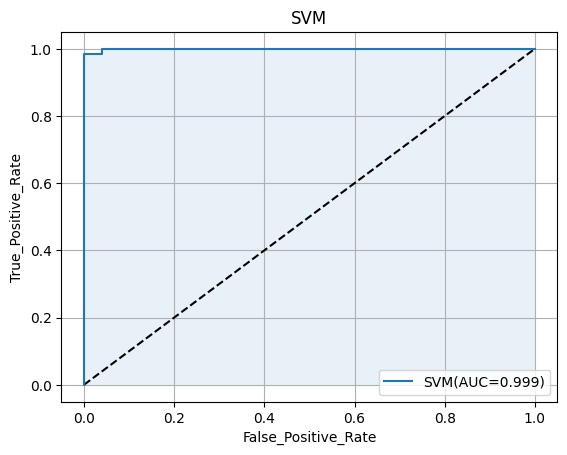

In [27]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(fpr_test, tpr_test, label='SVM(AUC=%.3f)'% auc_test)
plt.fill_between(fpr_test, tpr_test, 0, alpha=0.1)
plt.legend()
plt.title('SVM')
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.grid(True)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
gse_mRNA_exprs_normal_selected_trainval, gse_mRNA_exprs_normal_selected_test = train_test_split(gse_mRNA_exprs_normal_selected.T, train_size=0.75, random_state=0)
gse_mRNA_exprs_tumor_selected_trainval, gse_mRNA_exprs_tumor_selected_test = train_test_split(gse_mRNA_exprs_tumor_selected.T, train_size=0.75, random_state=0)

In [30]:
gse_mRNA_exprs_normal_selected_train, gse_mRNA_exprs_normal_selected_val = train_test_split(gse_mRNA_exprs_normal_selected_trainval, train_size=0.667, random_state=0)
gse_mRNA_exprs_tumor_selected_train, gse_mRNA_exprs_tumor_selected_val = train_test_split(gse_mRNA_exprs_tumor_selected_trainval, train_size=0.667, random_state=0)

In [31]:
gse_mRNA_exprs_train = pd.concat([gse_mRNA_exprs_normal_selected_train, gse_mRNA_exprs_tumor_selected_train])
X_train=gse_mRNA_exprs_train.iloc[:, 0:-1]
y_train=gse_mRNA_exprs_train.iloc[:, -1]
gse_mRNA_exprs_val = pd.concat([gse_mRNA_exprs_normal_selected_val, gse_mRNA_exprs_tumor_selected_val])
X_val=gse_mRNA_exprs_val.iloc[:, 0:-1]
y_val=gse_mRNA_exprs_val.iloc[:, -1]
gse_mRNA_exprs_test = pd.concat([gse_mRNA_exprs_normal_selected_test, gse_mRNA_exprs_tumor_selected_test])
X_test=gse_mRNA_exprs_test.iloc[:, 0:-1]
y_test=gse_mRNA_exprs_test.iloc[:, -1]

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_val_std=sc.transform(X_val)
X_test_std=sc.transform(X_test)

In [33]:
kernel=['linear', 'rbf']
C=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
best_score=0
for i in kernel:
  for j in C:
    for k in gamma:
      clf=SVC(kernel=i, C=j, gamma=k, random_state=0, probability=True)
      clf.fit(X_train_std, y_train)
      y_val_pred=clf.predict_proba(X_val_std)[:, 1]
      gs_score=roc_auc_score(y_val, y_val_pred)

      if gs_score > best_score:
        best_score =gs_score
        best_params={'kernel':i, 'C':j, 'gamma':k}

In [34]:
print(best_score)
print(best_params)

0.9965277777777778
{'kernel': 'linear', 'C': 0.1, 'gamma': 0.001}


In [35]:
from sklearn.metrics import roc_auc_score
clf=SVC(**best_params, random_state=0, probability=True)
clf.fit(X_train_std, y_train)
y_pred=clf.predict_proba(X_test_std)[:, 1]
test_score=roc_auc_score(y_test, y_pred)
print(test_score)

1.0


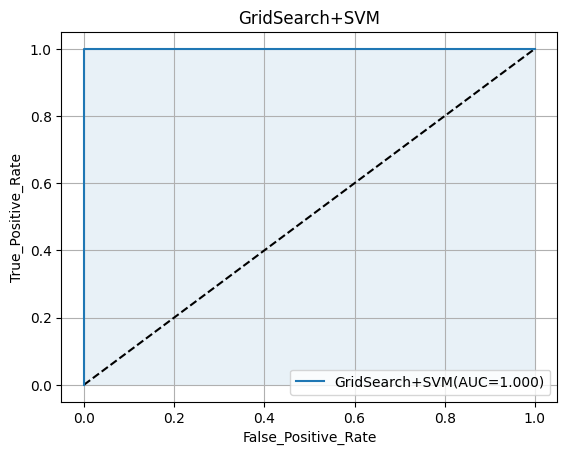

In [36]:
from sklearn.metrics import auc, roc_curve
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_pred)
auc_test=auc(fpr_test, tpr_test)

plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(fpr_test, tpr_test, label='GridSearch+SVM(AUC=%.3f)'% auc_test)
plt.fill_between(fpr_test, tpr_test, 0, alpha=0.1)
plt.legend()
plt.title('GridSearch+SVM')
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.grid(True)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

In [39]:
hyperparameter_gs={'kernel':['linear', 'rbf'],
                   'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'random_state':[0],
                   'probability':[True],
                   }

In [41]:
skf=StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
grid_search=GridSearchCV(SVC(), param_grid=hyperparameter_gs, cv=skf, scoring='f1')
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf'], 'probability': [True],
                         'random_state': [0]},
             scoring='f1')

In [42]:
grid_search.best_score_

0.9833229101521784

In [43]:
grid_search.best_estimator_

SVC(C=0.1, gamma=0.1, probability=True, random_state=0)

In [44]:
from functools import partial
import optuna
from sklearn.model_selection import cross_val_score

In [45]:
def objective_svc(trial):
  params_svc={
      #trialはハイパーパラメータの範囲を指定する
      #'kernel'はカテゴリカル変数：'linear'か'rbf'かをoptunaに選ばせる
      'kernel':trial.suggest_categorical('kernel', ['linear', 'rbf']),

      #'C'は連続値だが、対数的な取り方を行う。0.001から1000までの値をoptunaに選ばせる
      'C': trial.suggest_float('C', 1e-3, 1e3, log=True),

      #'gamma'も連続値だが、対数的な取り方を行う。0.001から1000までの値をoptunaに選ばせる
      'gamma': trial.suggest_float('gamma', 1e-3, 1e3, log=True),
      'random_state':0,
  }

  clf=SVC(**params_svc)

  skf=StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

  #グリッドサーチとは別の最適化手法を用いるため、GridSearchCVは使わない
  #代わりにcross_val_score()で交差検証を行う
  #cross_val_score()の性能指標について、'roc_auc'の選択できるが、ここではF1スコアを用いる
  #return metricで最適化すべき目的関数をmetricに指定する

  train_scores=cross_val_score(clf, X_train_std, y_train, cv=skf, scoring='f1')
  metric=train_scores.mean()
  return metric

In [46]:
obj_svc=partial(objective_svc)
sampler=optuna.samplers.TPESampler(seed=0)
#F1スコアを最大化するためにdirection='maximize'にする
study_svc=optuna.create_study(sampler=sampler, direction='maximize')
#回数を指定する
study_svc.optimize(obj_svc, n_trials=100)

[I 2024-04-24 11:57:37,197] A new study created in memory with name: no-name-3d84a218-31b3-47f1-b34c-ea2a35b0ae8c
[I 2024-04-24 11:57:37,254] Trial 0 finished with value: 0.9085535622572826 and parameters: {'kernel': 'rbf', 'C': 4.135997393839888, 'gamma': 1.8590843630169627}. Best is trial 0 with value: 0.9085535622572826.
[I 2024-04-24 11:57:37,290] Trial 1 finished with value: 0.7142857142857143 and parameters: {'kernel': 'rbf', 'C': 0.4222048983149828, 'gamma': 224.2012371372442}. Best is trial 0 with value: 0.9085535622572826.
[I 2024-04-24 11:57:37,328] Trial 2 finished with value: 0.9464014562053777 and parameters: {'kernel': 'linear', 'C': 56.27949975223143, 'gamma': 1.490628836610164}. Best is trial 2 with value: 0.9464014562053777.
[I 2024-04-24 11:57:37,364] Trial 3 finished with value: 0.7142857142857143 and parameters: {'kernel': 'rbf', 'C': 0.002668187524237051, 'gamma': 0.003332543279005117}. Best is trial 2 with value: 0.9464014562053777.
[I 2024-04-24 11:57:37,401] Tri

In [47]:
print(study_svc.best_params)
print(study_svc.best_value)

{'kernel': 'rbf', 'C': 2.3506417870573966, 'gamma': 0.3291953699407669}
0.9837323979462153
